                    Feature  Coefficient  Exp(Coefficient)
0               mean radius    -1.768615          0.170569
1              mean texture    -1.683654          0.185694
2            mean perimeter    -1.721853          0.178735
3                 mean area    -1.464115          0.231283
4           mean smoothness    -0.611027          0.542793
5          mean compactness    -0.351329          0.703752
6            mean concavity    -1.296870          0.273386
7       mean concave points    -2.010308          0.133947
8             mean symmetry    -0.481004          0.618163
9    mean fractal dimension     0.818739          2.267638
10             radius error    -1.132073          0.322364
11            texture error    -0.058962          0.942743
12          perimeter error    -0.852933          0.426163
13               area error    -0.745262          0.474610
14         smoothness error    -0.039343          0.961421
15        compactness error     0.672488          1.9591

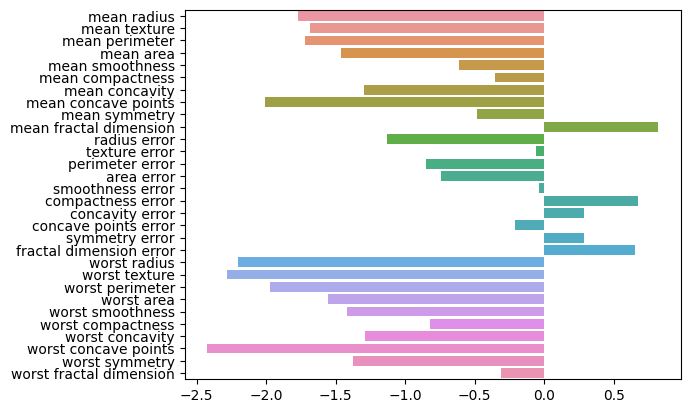

In [3]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import os
from interpret import show
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import seaborn as sns
import pandas as pd
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
set_visualize_provider(InlineProvider())
from dython.nominal import associations  # correlation calculation


# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (0 for malignant, 1 for benign)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


def get_normalization(X):
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized


X_train = get_normalization(X_train)
X_test = get_normalization(X_test)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Retrieve the feature names and coefficients
feature_names = data.feature_names
coefficients = model.coef_[0]


# Calculate the exponentiated coefficients
exp_coefficients = np.exp(coefficients)

# Create a DataFrame to display the coefficients and their exponentiated values
coef_table = pd.DataFrame(
    {'Feature': feature_names, 'Coefficient': coefficients, 'Exp(Coefficient)': exp_coefficients})

sns.barplot(x=coefficients, y=feature_names)

# Display the table
print(coef_table)

train_data = pd.read_csv("./datasets/titanic.csv")
train_data = train_data.dropna()
train_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {
                   'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
train_data = train_data.drop(
    columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X = train_data.drop(columns=['Survived'], axis=1)
Y = train_data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
explainer = ClassifierExplainer(model, X_test, Y_test)
# ExplainerDashboard(explainer).run()

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy*100, '%')
# Retrieve the feature names and coefficients
feature_names = X.columns
coefficients = abs(model.coef_[0])


# Calculate the exponentiated coefficients
exp_coefficients = np.exp(coefficients)

# Create a DataFrame to display the coefficients and their exponentiated values
coef_table = pd.DataFrame(
    {'Feature': feature_names, 'Coefficient': coefficients, 'Exp(Coefficient)': exp_coefficients})







In [4]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.jobl

ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_a5aa907e-f321-4183-86be-4b91c9904cb2 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000025A2C4D2110>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

permutation feature importance

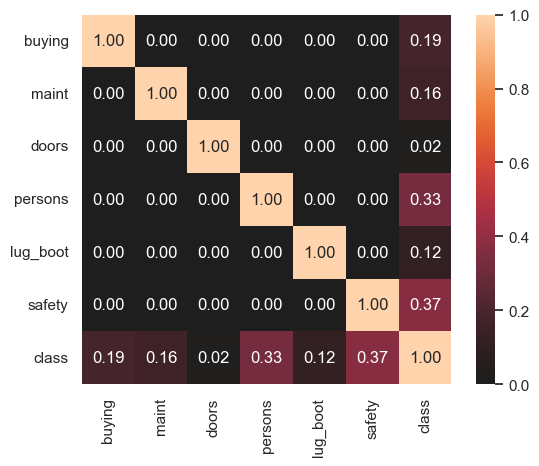

Model accuracy score with 10 decision-trees : 0.9247


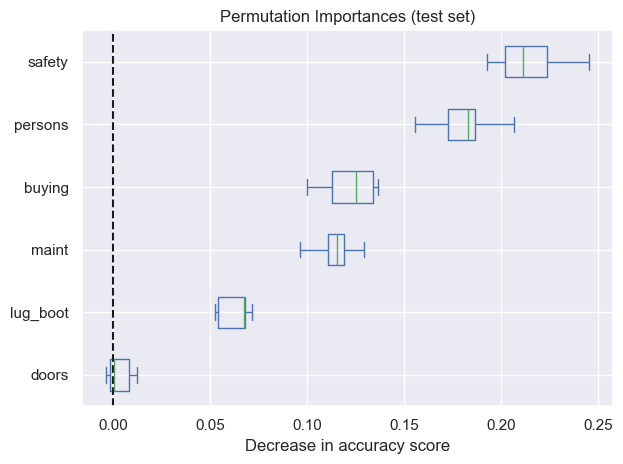

In [12]:
# fetch dataset
# List of column names. A header needs to be added because the raw data does not contain one.
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# Create DataFrame from the dataset.
df = pd.read_csv('./datasets/car.data.csv', header=None, names=col_names)
associations(df)
# Create the new encoded columns in the DataFrame by mapping the feature and label columns with the desired order.
df['buying'] = df['buying'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})
df['maint'] = df['maint'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})
df['doors'] = df['doors'].map({'2':0, '3':1, '4':2, '5more':3})
df['persons'] = df['persons'].map({'2':0, '4':1, 'more':2})
df['lug_boot'] = df['lug_boot'].map({'small':0, 'med':1, 'big':2})
df['safety'] = df['safety'].map({'low':0, 'med':1, 'high':2})
df['class'] = df['class'].map({'unacc':0, 'acc':1, 'good':2, 'vgood':3})
# View last five rows of DataFrame.
# Features.
X = df.drop(columns=['class'])  # Features except 'class'
y = df['class']  # Labels ('class' column)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

encoder = ce.OrdinalEncoder(
    cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
# import Random Forest classifier


# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)


# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))
result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


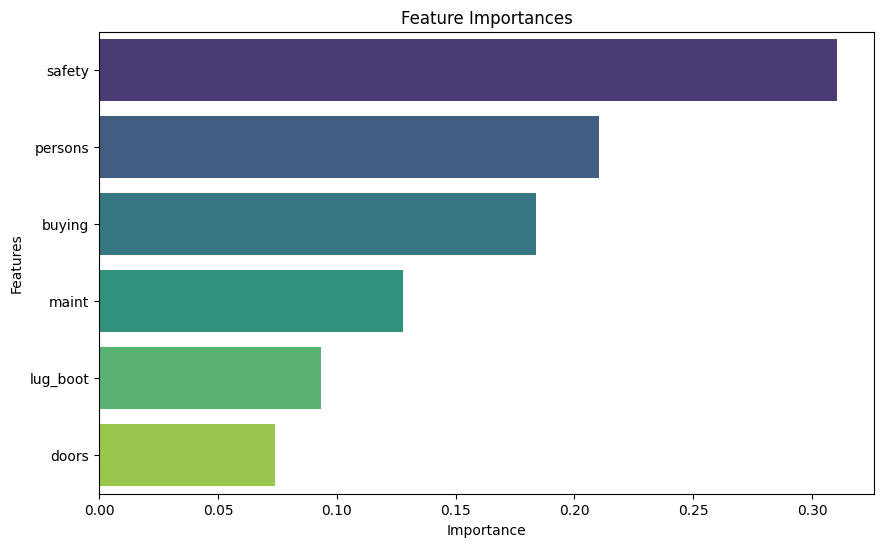

<Axes: >

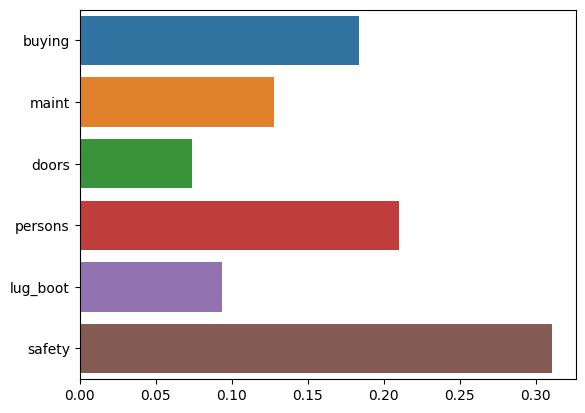

In [6]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfc.feature_importances_})

# Sort the DataFrame by the 'Importance' column in descending order
sorted_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Importance', y='Feature', data=sorted_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
sns.barplot(x=rfc.feature_importances_, y=X_train.columns)


In [10]:
from sklearn.svm import SVC
# Load libraries
import pandas as pd
from pandas import set_option
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost 
import matplotlib.pyplot as plt

def find_best_k(X, y, max_k=20, cv=5):
    """
    Find the best k value for KNN classifier using cross-validation.
    
    Parameters:
    - X: Input features
    - y: Target variable
    - max_k: Maximum value of k to try (default: 20)
    - cv: Number of folds for cross-validation (default: 5)
    
    Returns:
    - best_k: Best value of k
    - best_accuracy: Cross-validation accuracy with the best k
    - best_model: Best KNN model with the best k
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define a range of k values to try
    k_values = list(range(1, max_k + 1))

    # Dictionary to store mean cross-validation accuracies for each k
    cv_scores = {}

    # Perform cross-validation for each k
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=cv)
        cv_scores[k] = np.mean(scores)

    # Find the best k based on cross-validation scores
    best_k = max(cv_scores, key=cv_scores.get)
    best_accuracy = cv_scores[best_k]

    # Train the best KNN model on the full training set
    best_model = KNeighborsClassifier(n_neighbors=best_k)
    best_model.fit(X_train, y_train)

    return best_k, best_accuracy, best_model

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)
preds_lr = lr_model.predict(X_test)
print(lr_model.coef_[0])
print("The test accuracy score of logistic regression is ",
      accuracy_score(y_test, preds_lr), f1_score(y_test, preds_lr, average='macro'))


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
preds_rf = rf_model.predict(X_test)
print("The test accuracy score of random forest is ",
      accuracy_score(y_test, preds_rf), f1_score(y_test, preds_rf, average='macro'))


xgb_model = xgboost.XGBClassifier(n_estimators=100, random_state=1)
xgb_model.fit(X_train,y_train)
preds_xgb = xgb_model.predict(X_test)
print("The test accuracy score of XGBoost is ",
      accuracy_score(y_test, preds_xgb), f1_score(y_test, preds_xgb, average='macro'))

best_k, best_accuracy, knn_model = find_best_k(X, y)
knn_model.fit(X_train,y_train)
preds_knn = knn_model.predict(X_test)
print("The test accuracy score of knn is ",
      accuracy_score(y_test, preds_knn), f1_score(y_test, preds_knn, average='macro'))

# instantiating the object and fitting
svm_model = SVC(kernel='rbf', C=1, random_state=42,max_iter=1000).fit(X_train, y_train)

# predicting the values
y_pred_svm = svm_model.predict(X_test)

# displaying the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(
    y_test, y_pred_svm), f1_score(y_test, y_pred_svm, average='macro'))
perm_importance = permutation_importance(
    svm_model, X_test, y_test, n_repeats=50, random_state=42)
knn_model_perm_importance = permutation_importance(
    knn_model, X_test, y_test, n_repeats=50, random_state=42)

# Get feature importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
svm_importances = perm_importance
logireg_importances = np.abs(lr_model.coef_[0])

# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'Logistice Regression': logireg_importances,
    'Support Vector Mcahine': svm_importances.importances_mean,
    'K Nearest Neighbor': knn_model_perm_importance.importances_mean,
})

display(feature_importances)


C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[-0.6955525  -0.57295147 -0.03678768  1.1754176  -0.20858112 -0.95622657]
The test accuracy score of logistic regression is  0.7373029772329247 0.322733918128655
The test accuracy score of random forest is  0.9404553415061296 0.8384913773840782
The test accuracy score of XGBoost is  0.978984238178634 0.9201419698314108
The test accuracy score of knn is  0.8879159369527145 0.658740734200857
The test accuracy score of SVM is  0.8984238178633975 0.6719170213448233


C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


,Feature,RandomForest,XGBoost,Logistice Regression,Support Vector Mcahine,K Nearest Neighbor
0,buying,0.152264,0.120815,0.695552,0.106340,0.105499
1,maint,0.152755,0.121770,0.572951,0.095377,0.090648
2,doors,0.071358,0.033514,0.036788,-0.005289,-0.002417
3,persons,0.228268,0.359059,1.175418,0.202557,0.178354
4,lug_boot,0.095231,0.076594,0.208581,0.018984,0.049317
5,safety,0.300125,0.288248,0.956227,0.203222,0.189772


C:\Users\versu\AppData\Local\Temp\ipykernel_9472\1965959024.py:14: UserWarning: The figure layout has changed to tight


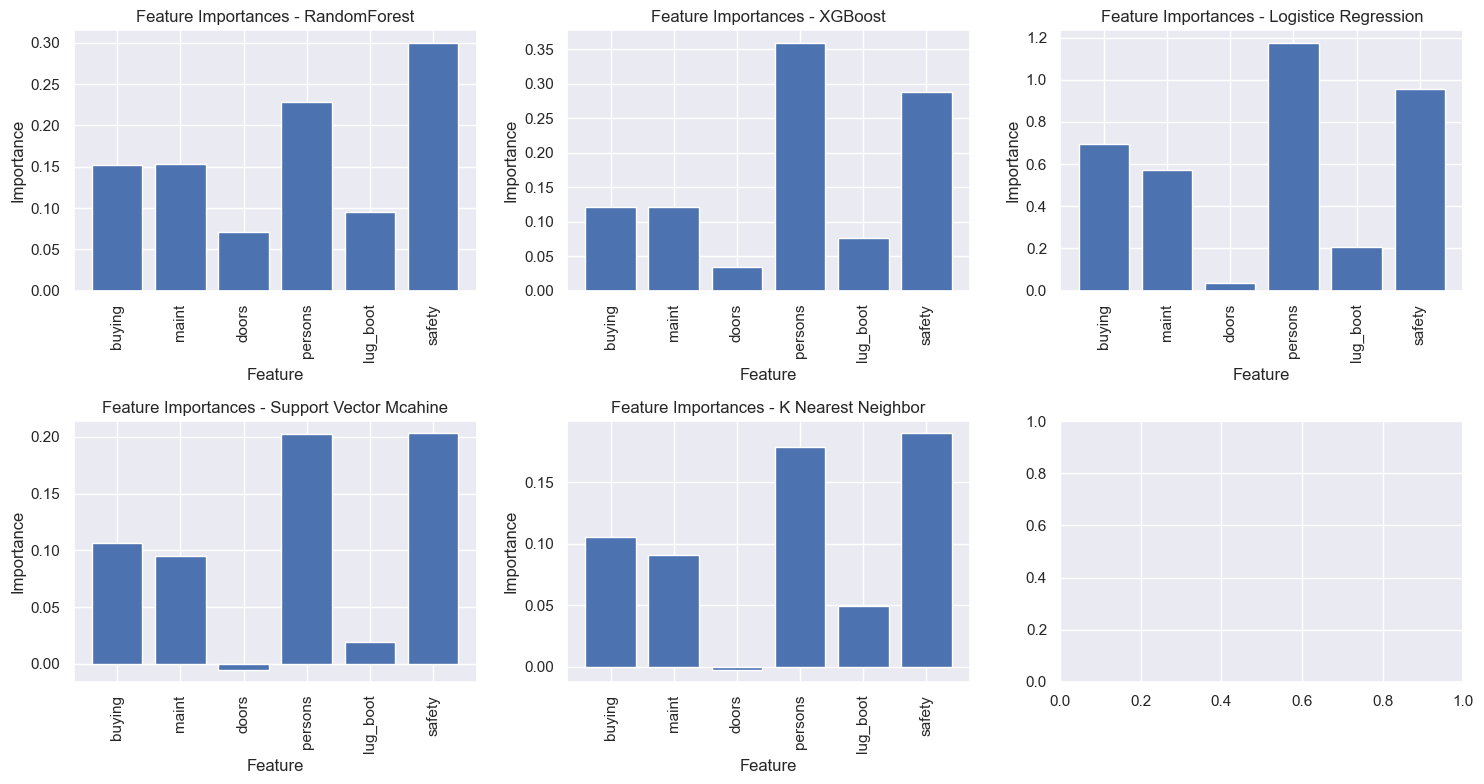

In [11]:

sns.set(font_scale=1)

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), constrained_layout=True)

# Plotting feature importances for each model
for i, model in enumerate(feature_importances.columns[1:]):
    ax = axes.flatten()[i]
    ax.bar(feature_importances['Feature'], feature_importances[model])
    ax.set_title(f'Feature Importances - {model}')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Importance')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()
plt.show()



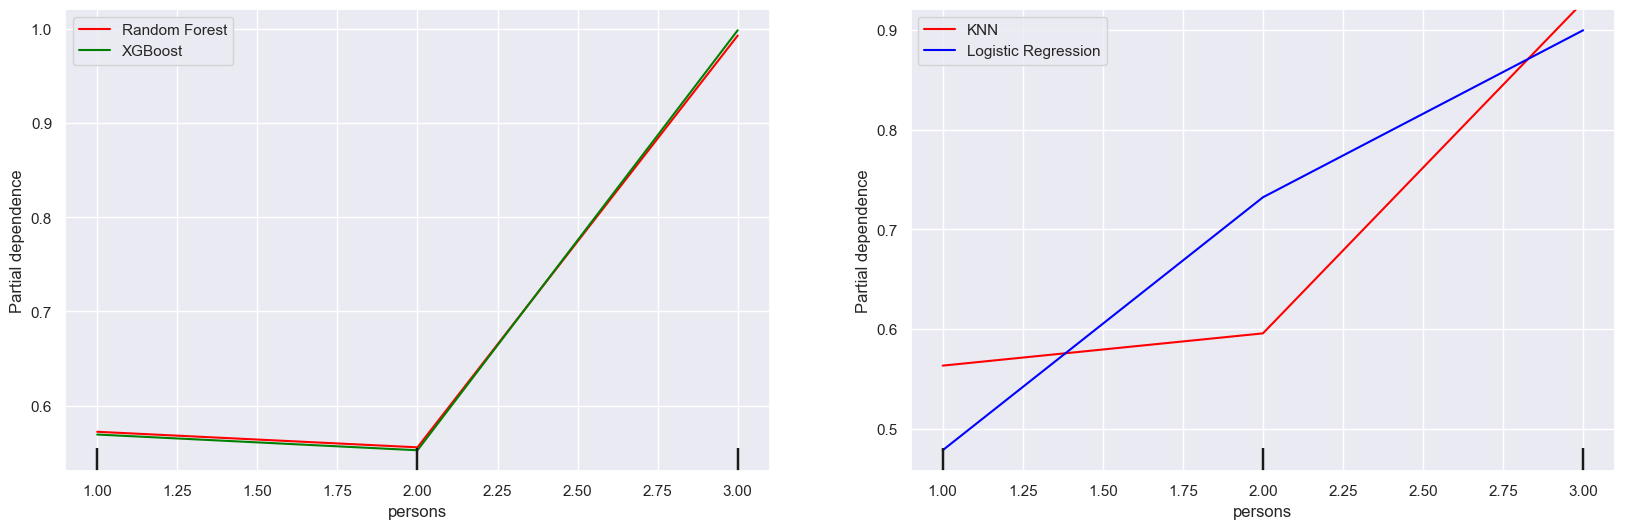

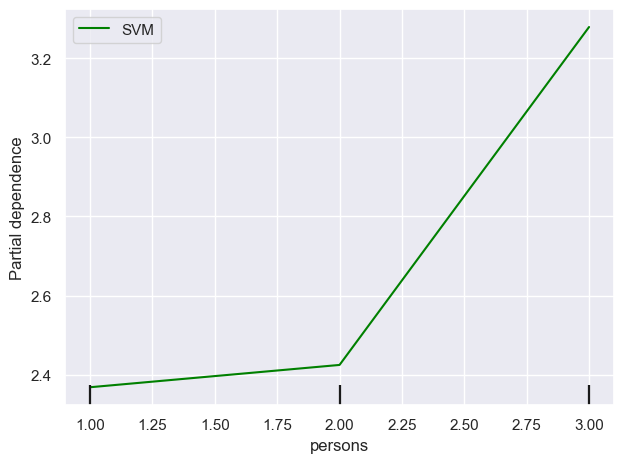

In [17]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
feature_names = [3]
# Creating subplots side by side
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(rf_model, X_train, features=feature_names,feature_names=X.columns, ax=ax,line_kw={"color": "red","label": "Random Forest"},target=0)
PartialDependenceDisplay.from_estimator(xgb_model, X_train, features=feature_names,feature_names=X.columns, ax=disp.axes_,line_kw={"color": "green","label": "XGBoost"},target=0)
ax.set_xlim([-4, 4]) 
ax.set_ylim([0, 1]) 

plt.legend()  # Show legend
# Second subplot with two lines for cosine waves
ax = plt.subplot(1, 2, 2)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(knn_model, X_train, features=feature_names,feature_names=X.columns, ax=ax,line_kw={"color": "red","label": "KNN"},target=0)
disp = PartialDependenceDisplay.from_estimator(lr_model, X_train, features=feature_names,feature_names=X.columns, ax=disp.axes_,line_kw={"color": "blue","label": "Logistic Regression"},target=0)

plt.legend()  # Show legend
plt.show()
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(svm_model, X_train, features=feature_names,feature_names=X.columns, ax=ax,line_kw={"color": "green","label": "SVM"},target=0)
plt.tight_layout()  # Adjust spacing between plots for better appearance
plt.show()

# ax5 = plt.subplot(1, 2, 1)  # (rows, columns, index)
# PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[(3,1)],feature_names=X.columns, ax=ax5,line_kw={"color": "red","label": "random forest"})
# plt.tight_layout()  # Adjust spacing between plots for better appearance
# plt.show()


Mean cross-validation score: 0.96
K-fold CV average score: 0.96


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

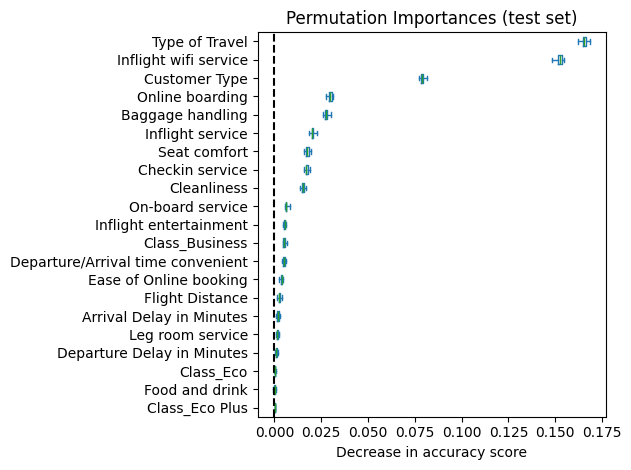

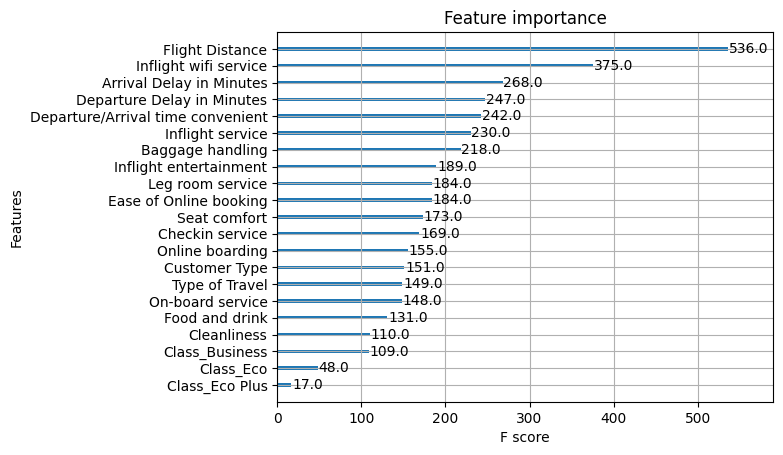

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier, plot_importance
df = pd.read_csv('./datasets/train_airline_customer_satisfication.csv')
df.dropna()
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df = pd.get_dummies(df)

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(random_state=421)

xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)

# - cross validataion
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc.predict(X_test)
# cm = confusion_matrix(y_test,ypred)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# accuracy_score(y_test,ypred)
result = permutation_importance(
    xgbc, X_test, y_test, n_repeats=20, random_state=42, n_jobs=5
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# orig_feature_names = X_train.columns
# feature_important = xgbc.feature_importances_
# keys = list(feature_important.keys())
# values = list(feature_important.values())

# data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")#, ascending=False)
# ax =data.plot(kind='barh', figsize = (20,10))
# ax.set_yticklabels(orig_feature_names); ## plot top features
# ax.set_xlabel("F-Score")
# ax.set(xlabel="F-Score", ylabel="Featurese")
# ax.set_title('Feature Importance')
plot_importance(xgbc)


Support vector machine for credit card fraud detection